# Análisis y Reporte sobre el desempeño del modelo.

Estudiante: Yoceline Aralí Mata Ledezma

Matrícula: A01562116

A continuación se muestra el análisis sobre el desempeño al entrenar un modelo utilizando Random Forest Classification de la biblioteca scikit-learn. Este modelo predice la especie de las flores Iris utilizando las medidas de los sepalos y petalos de las flores. 

* Importación de librerias y carga de los datos.

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [88]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [89]:
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target, columns=["species"])

In [90]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [91]:
y.head()

,species
0,0
1,0
2,0
3,0
4,0


In [92]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


## Separación de los datos en conjunto de entrenamiento, validación y prueba

Se realiza la separación de los datos con el propósito de entrenar el modelo con el 60% de los datos; validar el modelo con el 20% de los datos, es decir, observar su desempeño con datos distintos a los de entrenamiento y ajustarlo hasta encontrar el que funcione mejor con los datos de validación; y finalmente, para probar el modelo final con el 20% de los datos luego de haber ajustado los hiperparámetros.

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.6)

X_val, X_test, y_val, y_test = train_test_split(X_rem,y_rem, test_size=0.5)
y_train, y_val, y_test = y_train["species"], y_val["species"],  y_test["species"]

## Entrenamiento del modelo

Se decidió utilizar el modelo RandomForestClassifier, ya que se trata de los modelos que suelen tener mejor desempeño en problemas de clasificación, pues se combinan las predicciones de varios arboles de desición para mejorar la generalización del modelo, ya que teniendo un solo árbol de desición se tiene al sobreajuste.

In [94]:
from sklearn.ensemble import RandomForestClassifier
  
model = RandomForestClassifier(n_estimators = 100)
  
model.fit(X_train, y_train)

RandomForestClassifier()

## Análisis de desempeño

In [95]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [96]:
Y_hat = model.predict(X_val)  # test the output by changing values
# Y_hat = [0 if x <= 0.5 else 1 for x in Y_pred]
accuracy_score(y_val, Y_hat)

0.9666666666666667

Se encontró que el modelo tiene un accuracy de 0.96 lo cual indica que en los datos de validación tiene un buen desempeño. Debido a que la cantidad de datos es muy pequeña, podría suceder que a pesar de que el modelo se haya desempeñado bien en los datos de validación, no lo haga con otros datos, por lo que se seguirá analizando el modelo y se ajustarán hiperparámetros.

In [97]:
from mlxtend.evaluate import bias_variance_decomp

In [98]:
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(model, X_train.values, y_train.values, X_val.values, y_val.values, loss='0-1_loss', random_seed=42)

In [99]:
avg_bias

0.03333333333333333

In [100]:
avg_var

0.00016666666666666666

In [101]:
avg_bias - avg_var

0.033166666666666664

Al calcular el sesgo y varianza del modelo, se encontró que este tiene un mayor sesgo que varianza, con una diferencia de 0.033, esta diferencia es algo pequeña. Ambos, el sesgo y la varianza tienen valores bajos.

Aunque corre el riesgo de que haya **underfitting** en el modelo, ya que es mayor el sesgo, lo cual significaría que el modelo se está desempeñando mal en el conjunto de prueba y el de entrenamiento, al observar el accuracy del modelo puede decirse que esto no es así, sin embargo se busca mejorar el modelo.


## Regularización y ajuste de hiperpárametros

Para evitar el sobreajuste de los datos, así como evitar el overfitting o underfitting, es necesario regularizar los modelos, en el caso del random forest classifier una forma de regularizarlo es ajustar sus hiperparámetros. A continuación se prueban distintos hiperparámetros utilizando la técnica GridSearchCV de la biblioteca scikit-learn, con la cual se entrena el modelo con distintas combinaciones de hiperpárametros hasta encontrar aquel modelo que tiene un mejor desempeño.

Los hiperparámetros con lo que se decidió probar son los siguientes:

In [102]:
param_grid = {
                 'n_estimators': [200, 400, 600, 1000],
                 'max_depth':[10, 20, 30, 80, 100, None]
             }

A continuación se realiza la búsqueda y posteriormente se gráfica el desempeño de las distintas combinaciones de modelos.

In [103]:
from sklearn.model_selection import GridSearchCV
classifier = RandomForestClassifier()
grid_clf = GridSearchCV(classifier, param_grid, cv=10)
grid_clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, 80, 100, None],
                         'n_estimators': [200, 400, 600, 1000]})

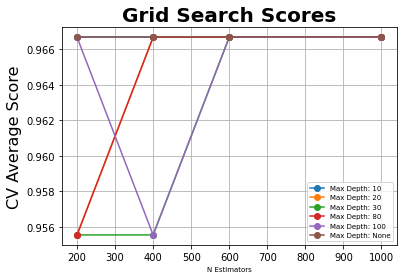

In [104]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))
     
    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=7)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc="best", fontsize=7)
    ax.grid('on')

# Calling Method 
plot_grid_search(grid_clf.cv_results_, param_grid["n_estimators"], param_grid["max_depth"], 'N Estimators', 'Max Depth')

In [105]:
grid_clf.best_estimator_

RandomForestClassifier(max_depth=10, n_estimators=200)

In [106]:
grid_clf.best_score_

0.9666666666666666

Se encontró que el modelo con mejor desempeño es aquel que tiene una profundidad maxima de 10 y utiliza 200 estimadores, con un accuracy de 0.96. Teniendo un desempeño muy parecido al modelo planteado inicialmente.

## Predicciones en el conjunto de pruebas

In [107]:
predictions = grid_clf.best_estimator_.predict(X_test)

In [109]:
accuracy_score(y_test, predictions)

0.9

Finalmente, con los hiperparámetros encontrados, se calculó el accuracy en el conjunto de pruebas, dando un resultado de 0.9, lo cual significa que el modelo tiene un buen desempeño, es decir tiene la capacidad de generalizar en datos que no había visto antes.